In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
data = pd.read_csv('../data science/prisonedu.csv')

In [153]:
data.head()

,Year,Annual State Spending on Prisons,Average Number of Inmates,Average Cost per Inmate,Average Annual UC Tuition Cost (Resident)
0,1998-1999,"4,547,400,000","159,928",28434.04532,"2,896"
1,1999-2000,"4,748,000,000","161,479",29403.20413,"2,716"
2,2000-2001,"5,298,400,000","161,374",32833.04622,"2,716"
3,2001-2002,"5,641,000,000","158,180",35661.90416,"2,716"
4,2002-2003,"5,836,500,000","160,009",36476.07322,"3,121"


In [154]:
data.columns

Index(['Year', 'Annual\nState Spending\non Prisons',
       'Average Number of Inmates', 'Average\nCost per Inmate',
       'Average\nAnnual UC Tuition Cost (Resident)'],
      dtype='object')

In [155]:
column_low = data.columns.str.lower()

column_low = column_low.str.replace('\n', ' ')
column_low = column_low.str.replace(' ','_')

In [156]:
column_low

Index(['year', 'annual_state_spending_on_prisons', 'average_number_of_inmates',
       'average_cost_per_inmate', 'average_annual_uc_tuition_cost_(resident)'],
      dtype='object')

In [157]:
data.columns = column_low
data.head()

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
0,1998-1999,"4,547,400,000","159,928",28434.04532,"2,896"
1,1999-2000,"4,748,000,000","161,479",29403.20413,"2,716"
2,2000-2001,"5,298,400,000","161,374",32833.04622,"2,716"
3,2001-2002,"5,641,000,000","158,180",35661.90416,"2,716"
4,2002-2003,"5,836,500,000","160,009",36476.07322,"3,121"


In [158]:
data.isna().sum()

year                                         0
annual_state_spending_on_prisons             0
average_number_of_inmates                    8
average_cost_per_inmate                      8
average_annual_uc_tuition_cost_(resident)    0
dtype: int64

In [159]:
rows_null = data.average_number_of_inmates.isna()
data[rows_null]

#these rows null bc missing Inmate Population, waiting for email with updated report from DCR

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
14,2012-2013,"8,612,700,000.00",NaN,NaN,"11,160"
15,2012-2014,"921,300,000.00",NaN,NaN,"11,160"
16,2014-2015,"9,951,400,000.00",NaN,NaN,"11,160"
17,2015-2016,"10,084,900,000.00",NaN,NaN,"11,160"
18,2016-2017,"10,790,900,000.00",NaN,NaN,"11,160"
19,2017-2018,"11,616,400,000.00",NaN,NaN,"11,442"
20,2018-2019,"12,495,200,000.00",NaN,NaN,"11,442"
21,2019-2020,"12,482,200,000.00",NaN,NaN,"11,442"


In [160]:
datafull = data.dropna()

#mask, data table with rows containing null values dropped

In [161]:
datafull

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
0,1998-1999,"4,547,400,000","159,928",28434.04532,"2,896"
1,1999-2000,"4,748,000,000","161,479",29403.20413,"2,716"
2,2000-2001,"5,298,400,000","161,374",32833.04622,"2,716"
3,2001-2002,"5,641,000,000","158,180",35661.90416,"2,716"
4,2002-2003,"5,836,500,000","160,009",36476.07322,"3,121"
5,2003-2004,"5,389,000,000","162,003",33264.81608,"4,271"
6,2004-2005,"6,968,200,000","163,529",42611.40226,"4,971"
7,2005-2006,"7,783,400,000","167,981",46335.00217,"5,406"
8,2006-2007,"9,117,800,000","172,597",52827.10592,"5,406"
9,2007-2008,"10,113,800,000","171,754",58885.38258,"5,790"


In [162]:
datafull.dtypes

year                                          object
annual_state_spending_on_prisons              object
average_number_of_inmates                     object
average_cost_per_inmate                      float64
average_annual_uc_tuition_cost_(resident)     object
dtype: object

In [163]:
obj_col = ['annual_state_spending_on_prisons','average_number_of_inmates','average_annual_uc_tuition_cost_(resident)']

In [164]:
#remove comma from all OBJECT columns

nocomma = datafull[obj_col].replace(',','',regex = True)
nocomma

#regex = True : replaces in every listed column

,annual_state_spending_on_prisons,average_number_of_inmates,average_annual_uc_tuition_cost_(resident)
0,4547400000,159928,2896
1,4748000000,161479,2716
2,5298400000,161374,2716
3,5641000000,158180,2716
4,5836500000,160009,3121
5,5389000000,162003,4271
6,6968200000,163529,4971
7,7783400000,167981,5406
8,9117800000,172597,5406
9,10113800000,171754,5790


In [165]:
datafull[obj_col] = nocomma
datafull

#reminder: 'datafull' is a copy of 'data', with null rows dropped

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
0,1998-1999,4547400000,159928,28434.04532,2896
1,1999-2000,4748000000,161479,29403.20413,2716
2,2000-2001,5298400000,161374,32833.04622,2716
3,2001-2002,5641000000,158180,35661.90416,2716
4,2002-2003,5836500000,160009,36476.07322,3121
5,2003-2004,5389000000,162003,33264.81608,4271
6,2004-2005,6968200000,163529,42611.40226,4971
7,2005-2006,7783400000,167981,46335.00217,5406
8,2006-2007,9117800000,172597,52827.10592,5406
9,2007-2008,10113800000,171754,58885.38258,5790


In [172]:
#convert all OBJECT COLUMNS to FLOAT64 type

float1 = datafull[obj_col].astype('float64')
datafull[obj_col] = float1

datafull.dtypes

year                                          object
annual_state_spending_on_prisons             float64
average_number_of_inmates                    float64
average_cost_per_inmate                      float64
average_annual_uc_tuition_cost_(resident)    float64
dtype: object

In [173]:
deep_data = datafull.copy(deep = True)
deep_data

#deep = True : turn off "SettingWithCopyWarning:"

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
0,1998-1999,4.547400e+09,159928.0,28434.04532,2896.0
1,1999-2000,4.748000e+09,161479.0,29403.20413,2716.0
2,2000-2001,5.298400e+09,161374.0,32833.04622,2716.0
3,2001-2002,5.641000e+09,158180.0,35661.90416,2716.0
4,2002-2003,5.836500e+09,160009.0,36476.07322,3121.0
5,2003-2004,5.389000e+09,162003.0,33264.81608,4271.0
6,2004-2005,6.968200e+09,163529.0,42611.40226,4971.0
7,2005-2006,7.783400e+09,167981.0,46335.00217,5406.0
8,2006-2007,9.117800e+09,172597.0,52827.10592,5406.0
9,2007-2008,1.011380e+10,171754.0,58885.38258,5790.0


In [171]:
avg_inmate_cost = datafull['annual_state_spending_on_prisons']/datafull['average_number_of_inmates']
avg_inmate_cost = round(avg_inmate_cost,2)

deep_data['average_cost_per_inmate'] = avg_inmate_cost
deep_data

,year,annual_state_spending_on_prisons,average_number_of_inmates,average_cost_per_inmate,average_annual_uc_tuition_cost_(resident)
0,1998-1999,4.547400e+09,159928.0,28434.05,2896.0
1,1999-2000,4.748000e+09,161479.0,29403.20,2716.0
2,2000-2001,5.298400e+09,161374.0,32833.05,2716.0
3,2001-2002,5.641000e+09,158180.0,35661.90,2716.0
4,2002-2003,5.836500e+09,160009.0,36476.07,3121.0
5,2003-2004,5.389000e+09,162003.0,33264.82,4271.0
6,2004-2005,6.968200e+09,163529.0,42611.40,4971.0
7,2005-2006,7.783400e+09,167981.0,46335.00,5406.0
8,2006-2007,9.117800e+09,172597.0,52827.11,5406.0
9,2007-2008,1.011380e+10,171754.0,58885.38,5790.0


In [175]:
round(deep_data['annual_state_spending_on_prisons'].mean(),2)

7195285714.29

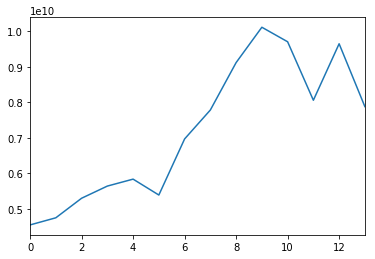

In [188]:
deep_data['annual_state_spending_on_prisons'].plot(kind = 'line')

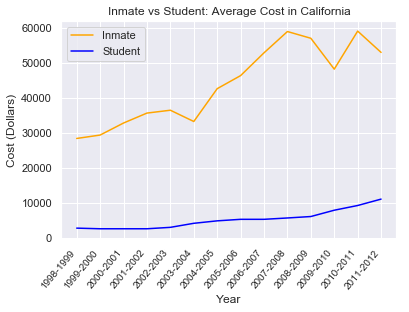

In [243]:
sns.set()
sns.axes_style()

compare = sns.lineplot( x='year', y='average_cost_per_inmate', color ='orange', data = deep_data)
compare = sns.lineplot(x='year', y='average_annual_uc_tuition_cost_(resident)', color ='blue',data = deep_data)



compare.set(xlabel='Year', ylabel='Cost (Dollars)')
#compare.set_xticklabels(compare.get_xticklabels(), rotation=45)

plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light', fontsize='small')
plt.title("Inmate vs Student: Average Cost in California")
plt.legend(labels=['Inmate','Student'])
plt.show()